# Unit 5 - Financial Planning

In [31]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [32]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [155]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [156]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [157]:
# Fetch current BTC price
btc = requests.get(btc_url).json()
(json.dumps(btc, indent=4))

# Fetch current ETH price
eth = requests.get(eth_url).json()
(json.dumps(eth, indent=4))


# Compute current value of my crpto
my_btc_value = my_btc * (btc['data']['1']['quotes']["CAD"]['price'])
my_eth_value = my_eth * (eth['data']['1027']['quotes']["CAD"]['price'])

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $30345.87
The current value of your 5.3 ETH is $6964.58


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [158]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [159]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [160]:
# Format current date as ISO format
today = pd.Timestamp("2022-06-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio.head()

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio_year = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-06-14 04:00:00+00:00,99.84,99.94,98.86,99.01,10937261,35088,99.251259,AGG
2022-06-14 04:00:00+00:00,376.84,377.94,370.59,373.87,103696930,823408,374.322388,SPY


In [161]:
# Pick AGG and SPY close prices
agg_close_price = 99.01
spy_close_price = 373.87

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.01
Current SPY closing price: $373.87


In [162]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18693.50
The current value of your 200 AGG shares is $19802.00


### Savings Health Analysis

In [163]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_crypto_value = my_btc_value + my_eth_value
my_shares_value = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame(index = ["Crypto", "Shares"])

# Fetch the value of crypto holdings and shares value
df_savings["amount"] = [my_crypto_value, my_shares_value]

# Display savings DataFrame
display(df_savings)

,amount
Crypto,37310.44939
Shares,38495.50000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

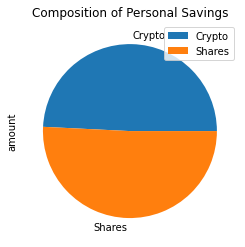

In [164]:
# Plot savings pie chart
df_savings.plot.pie(y="amount",title="Composition of Personal Savings")

In [165]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_crypto_value + my_shares_value

# Validate saving health
savings_list = [total_savings]
for savings in savings_list:
    if savings > emergency_fund:
        print("Congratulations!! There is more than sufficient value in your portfolio for an emergency fund!")
    elif savings == emergency_fund:
        print("Congratulations!! You have reached your financial goal")
    else: 
        print(f"Keep up the good work! You are ${emergency_fund - total_savings} away from reaching your financial goal")

Congratulations!! There is more than sufficient value in your portfolio for an emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [166]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [167]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [168]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_retirement_plan = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [169]:
# Printing the simulation input data
MC_retirement_plan.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [170]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_retirement_plan.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/luketarlinton/Desktop/Jupiter-Workspace/Instructions-2/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996248,1.014541,0.996469,1.009176,1.011526,0.998283,0.996712,1.003528,1.006396,1.000642,...,1.011913,1.006752,0.990018,0.995522,0.990331,1.007704,1.005306,1.002509,0.995166,1.007254
2,0.991332,1.015938,0.988310,1.003338,1.004978,0.989322,1.011483,1.013253,1.001740,1.001442,...,0.996209,1.027556,0.975283,0.993524,0.991607,1.004099,0.993647,1.004178,0.989079,1.007310
3,1.000292,1.029705,0.996625,1.017924,1.017757,0.988110,1.016196,1.010370,0.993001,0.985090,...,1.009557,1.031443,0.976237,0.996130,0.993302,1.011493,0.996618,1.003600,0.992563,1.000069
4,0.991282,1.051453,0.996586,1.029462,1.025233,0.987384,1.022035,1.004169,1.006671,0.980035,...,1.012939,1.029971,0.988440,0.996714,0.987564,1.012218,0.987249,1.011287,0.987754,1.003828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.476143,30.185987,19.411755,24.375442,16.599218,12.107542,31.256067,12.357421,12.398081,65.990303,...,15.870752,14.470945,27.546429,15.283996,12.925766,13.756463,23.870721,10.337239,13.081261,21.403659
7557,15.475159,30.197311,19.175850,24.299465,16.557703,12.179115,30.971837,12.357986,12.423290,65.722875,...,15.972788,14.387640,27.723614,15.307426,12.908129,13.708874,23.904361,10.271310,13.035944,21.480195
7558,15.412213,30.322855,19.190628,24.128960,16.472727,12.221869,31.017174,12.334001,12.421597,65.247424,...,15.756130,14.434486,27.800430,15.281751,12.974478,13.568622,23.784275,10.256320,13.002387,21.603013
7559,15.420120,30.128857,19.196794,24.264137,16.460911,12.120591,31.016776,12.510052,12.370971,64.872670,...,15.644031,14.550816,28.061704,15.362771,12.984249,13.533619,24.169279,10.113718,12.989493,21.630159


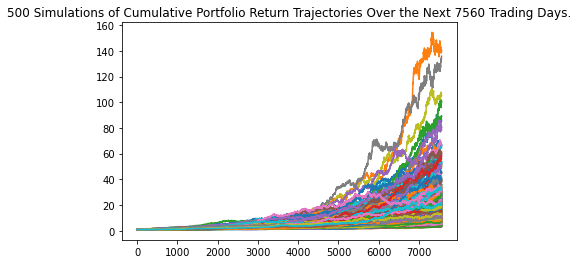

In [171]:
# Plot simulation outcomes
line_plot = MC_retirement_plan.plot_simulation()

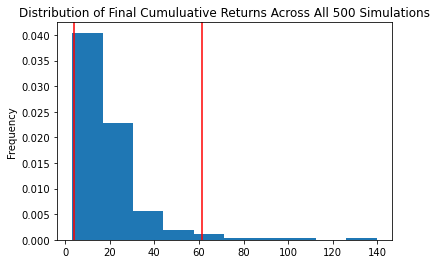

In [172]:
# Plot probability distribution and confidence intervals
dist_plot = MC_retirement_plan.plot_distribution()

### Retirement Analysis

In [173]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl = MC_retirement_plan.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl)

count           500.000000
mean             19.682005
std              15.852351
min               3.141312
25%              10.168063
50%              15.535639
75%              24.421888
max             139.629377
95% CI Lower      4.174039
95% CI Upper     61.277473
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [174]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_tbl[8]*initial_investment,2)
ci_upper = round(summary_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $83480.77 and $1225549.47


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [175]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_2 = round(summary_tbl[8]*initial_investment_2,2)
ci_upper_2 = round(summary_tbl[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_2} and ${ci_upper_2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $125221.16 and $1838324.2


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [176]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_retirement_plan_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2,.8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [177]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_retirement_plan_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/luketarlinton/Desktop/Jupiter-Workspace/Instructions-2/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997954,1.005189,1.004238,1.002587,1.003947,0.998846,0.987733,0.999661,1.000305,1.006510,...,1.003685,0.989143,0.987780,0.995707,0.991193,1.010294,0.993184,1.006788,1.004841,1.015471
2,0.993801,1.003734,1.014355,1.008736,0.998575,1.005169,0.973755,1.008668,0.982305,0.996817,...,1.000374,0.999494,0.973903,1.000817,0.997998,1.009733,0.991587,1.020028,0.980772,1.018944
3,1.008030,0.997853,1.011002,1.004838,0.987635,1.016779,0.991482,1.017211,0.983871,1.013287,...,1.003398,0.984633,0.977188,0.995763,0.984952,1.022621,0.984327,1.023934,0.987552,1.035443
4,1.009872,1.010458,1.002908,1.012065,0.993972,1.015509,1.002118,1.024626,0.982508,1.010162,...,1.005536,0.984356,0.972915,1.012458,0.977377,1.027823,0.973226,1.017502,0.977636,1.036990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.263609,2.138831,2.189050,1.275073,1.344623,4.122436,2.653172,1.065193,1.270275,1.467563,...,1.239595,1.510310,2.662239,1.405081,3.195895,1.611973,3.375174,1.009737,1.132458,1.861656
1257,3.261417,2.154135,2.201717,1.275551,1.362108,4.115870,2.642386,1.052012,1.267275,1.457017,...,1.210641,1.537377,2.605344,1.399620,3.141765,1.614391,3.440157,1.028455,1.134656,1.888938
1258,3.288739,2.162056,2.226819,1.266105,1.377366,4.102862,2.639142,1.052335,1.242714,1.458006,...,1.213054,1.508028,2.631460,1.420675,3.136258,1.625432,3.398602,1.029431,1.147668,1.879535
1259,3.313590,2.148143,2.237658,1.264398,1.372442,4.133256,2.610920,1.052906,1.244253,1.473536,...,1.226864,1.506564,2.631178,1.428545,3.131304,1.633819,3.353506,1.021394,1.143173,1.892548


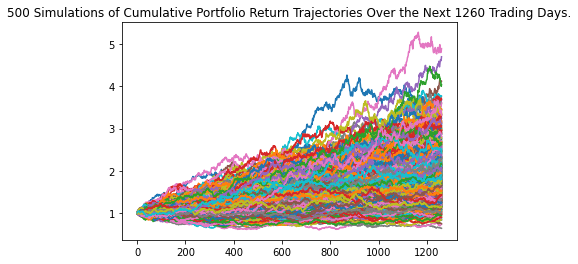

In [178]:
# Plot simulation outcomes
line_plot_5 = MC_retirement_plan_5.plot_simulation()

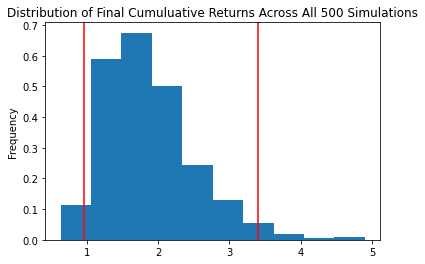

In [179]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_retirement_plan_5.plot_distribution()

In [180]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_5 = MC_retirement_plan_5.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl_5)

count           500.000000
mean              1.882226
std               0.640218
min               0.634128
25%               1.399108
50%               1.765898
75%               2.206284
max               4.898994
95% CI Lower      0.964012
95% CI Upper      3.401482
Name: 1260, dtype: float64


In [181]:
# Set initial investment
initial_investment_5 = my_shares_value

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of the current value of the stock and bond portion of the member's portfolio
ci_lower_5 = round(summary_tbl_5[8]*initial_investment_5,2)
ci_upper_5 = round(summary_tbl_5[9]*initial_investment_5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

There is a 95% chance that an initial investment of $38495.5 in the portfolio over the next 5 years will end within in the range of $37110.11 and $130941.76


### Ten Years Retirement Option

In [182]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_retirement_plan_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2,.8],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [183]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_retirement_plan_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/luketarlinton/Desktop/Jupiter-Workspace/Instructions-2/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.978751,0.994165,1.012347,1.003467,0.985278,0.995185,0.993816,0.999226,0.996557,1.008014,...,1.007115,0.999475,0.989832,0.983540,1.017152,1.002511,1.007839,0.993597,1.002375,1.004960
2,0.971755,0.985203,1.001096,1.003085,0.976221,1.003257,0.984211,0.995974,1.004777,1.009479,...,1.037006,0.995612,0.990199,0.973012,1.023825,1.012496,1.001266,1.001081,0.998078,1.002432
3,0.960184,0.980178,1.010358,0.990393,0.968842,1.008471,0.993714,0.997034,1.000496,1.024045,...,1.029391,1.001943,0.990773,0.967241,1.037611,1.007044,0.999388,1.017633,1.001159,0.995845
4,0.961276,0.987322,1.015928,0.976821,0.984512,1.025456,0.998560,0.993998,0.990811,1.019975,...,1.053105,1.011242,0.973404,0.966788,1.021570,1.008921,1.000590,1.018467,0.995686,0.992532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.784964,3.320249,2.871022,4.339767,2.160074,1.833231,3.545929,4.580366,2.815257,3.227204,...,1.690792,2.144340,2.519715,3.271876,5.491494,1.546946,2.580451,3.712781,4.720513,1.593425
2517,3.788171,3.297621,2.885761,4.393107,2.133056,1.853180,3.482457,4.562049,2.815729,3.201802,...,1.682669,2.169035,2.516413,3.259333,5.474559,1.544350,2.611945,3.606500,4.738044,1.604886
2518,3.799381,3.281547,2.897041,4.334483,2.147478,1.853817,3.457042,4.595122,2.836092,3.180161,...,1.702843,2.159365,2.534506,3.209339,5.425909,1.560092,2.647722,3.621985,4.705829,1.621267
2519,3.767637,3.278625,2.909293,4.336751,2.135513,1.875438,3.450540,4.532285,2.870180,3.168022,...,1.699798,2.175545,2.505167,3.209820,5.510143,1.560290,2.658830,3.635978,4.661627,1.616715


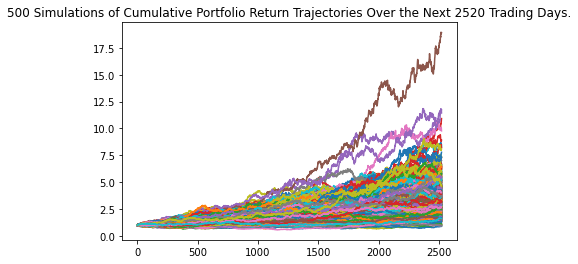

In [184]:
# Plot simulation outcomes
line_plot_10 = MC_retirement_plan_10.plot_simulation()

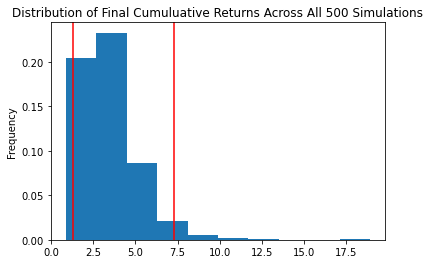

In [185]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_retirement_plan_10.plot_distribution()

In [186]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_10 = MC_retirement_plan_10.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl_10)

count           500.000000
mean              3.454270
std               1.751973
min               0.878600
25%               2.248168
50%               3.162939
75%               4.313529
max              18.909199
95% CI Lower      1.324381
95% CI Upper      7.303393
Name: 2520, dtype: float64


In [187]:
# Set initial investment
initial_investment_10 = my_shares_value

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of the current value of the stock and bond portion of the member's portfolio
ci_lower_10 = round(summary_tbl_10[8]*initial_investment_10,2)
ci_upper_10 = round(summary_tbl_10[9]*initial_investment_10,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")

There is a 95% chance that an initial investment of $38495.5 in the portfolio over the next 10 years will end within in the range of $50982.72 and $281147.76


### Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?

In our initial Monte Carlo simulation in which we assumed there was an initial investment made of $20,000 and a portfolio made up of 40% bonds and 60% stocks was held for 30 years. The results indicated that the member had a 95% chance that their investment in 30 years time would be worth between $83,480.77 and $1,225,549.47. Whereas in our final Monte Carlo simulation we assumed there was an initial investment made of $38,495.50 (current bond/share value) and a portfolio made up of 20% bonds and 80% stocks was held for 10 years. The results indicated that the member had a 95% chance that their investment in 30 years time would be worth between $50,982.72 and $281,147.76. Within the initial Monte Carlo simulation we saw a 317.404% increase on the initial investment of $20,000 on the lower end of the possible outcomes and a 6027.75% increase on the initial investment of $20,000 on the upper end of the possible outcomes. Comparing this with the final Monte Carlo simulation where we saw a 32.4381% increase on the initial investment of $38,495.50 on the lower end of the possible outcomes and a 630.339% increase on the initial investment of $38,495.50 on the upper end of the possible outcomes. This large disparity between the percentage increase seen in the initial investment of the initial and final Monte Carlo simulations indicate that even with the shift in weighting the portfolio more heavily towards stocks, the credit union member would struggle to retire in only 10 years as they would have to forgo the opportunity to potentially see their initial investment increase a further + 1,000%. In regards to a more definitive answer of whether the credit union members could retire after only 10 years, we would require further information regarding their annual spending habits, future plans and any outstanding debts in order to state whether they could in fact retire with their potential holdings after 10 years.